In [437]:
# import necassary packages
import pandas as pd
import numpy as np
import math as math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, recall_score,accuracy_score, precision_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer,  make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
from sklearn.dummy import DummyClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline


In [438]:
pd.set_option('display.max_columns', None)

In [439]:
# Load in the data source
df = pd.read_csv("data/bigmlphonedata.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [440]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [441]:
df.describe(include=object)

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,357-5696,no,no
freq,106,1,3010,2411


In [442]:
df.shape

(3333, 21)

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [444]:
df.describe(include=bool)

,churn
count,3333
unique,2
top,False
freq,2850


In [445]:
# Change the churn column from True/False to 1s and 0s. 
df['churn'] = df['churn'].astype(int)
mapping = {'yes': 1, 'no': 0}
df['international plan'] = df['international plan'].map(mapping)
df['voice mail plan'] = df['voice mail plan'].map(mapping)
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,370-3271,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,328-8230,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,364-6381,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [446]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,370-3271,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,328-8230,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,364-6381,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [447]:
df.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [448]:
X = df.drop('churn', axis=1)
y = df['churn']

In [449]:
# Find what percentage of customers are churning, our target variable
churn_count = y.value_counts(normalize=True).reset_index()
churn_count

,index,churn
0,0,0.855086
1,1,0.144914


In [450]:
# See number of customers with international plans and voice mail plans
print(df['international plan'].value_counts())
print(df['voice mail plan'].value_counts())

0    3010
1     323
Name: international plan, dtype: int64
0    2411
1     922
Name: voice mail plan, dtype: int64


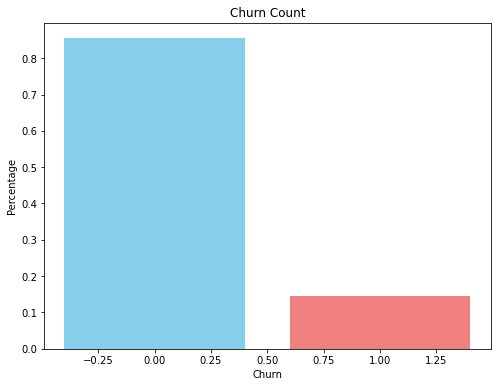

In [451]:
#Visualize percentage of customers who churn
colors = ['skyblue', 'lightcoral']
# Plot the data
plt.figure(figsize=(8, 6))
plt.bar(churn_count['index'], churn_count['churn'], color=colors)
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Churn Count')
plt.show()

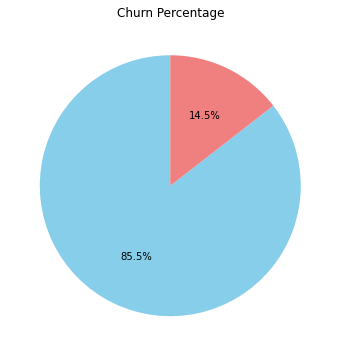

In [452]:
#Visualize percentage of customers who churn
plt.figure(figsize=(8, 6))
plt.pie(churn_count['churn'],  colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Churn Percentage')

plt.show()

In [453]:
'''
percentage_churn = df.groupby('international plan')['churn'].mean() * 100
colors = ['skyblue', 'lightcoral']
# Create a bar chart
plt.figure(figsize=(8, 6))
percentage_churn.plot(kind='bar', color=colors)
plt.xlabel('International Plan')
plt.ylabel('Percentage Churn')
plt.title('Percentage of Churn by International Plan')
plt.xticks(rotation=0)  # Avoid rotating x-axis labels
plt.show()'''

"\npercentage_churn = df.groupby('international plan')['churn'].mean() * 100\ncolors = ['skyblue', 'lightcoral']\n# Create a bar chart\nplt.figure(figsize=(8, 6))\npercentage_churn.plot(kind='bar', color=colors)\nplt.xlabel('International Plan')\nplt.ylabel('Percentage Churn')\nplt.title('Percentage of Churn by International Plan')\nplt.xticks(rotation=0)  # Avoid rotating x-axis labels\nplt.show()"

In [454]:
'''
percentage_churn = df.groupby('voice mail plan')['churn'].mean() * 100
colors = ['skyblue', 'lightcoral']
# Create a bar chart
plt.figure(figsize=(8, 6))
percentage_churn.plot(kind='bar', color=colors)
plt.xlabel('Voice Mail Plan')
plt.ylabel('Percentage Churn')
plt.title('Percentage of Churn by Voice Mail Plan')
plt.xticks(rotation=0)  # Avoid rotating x-axis labels
plt.show()'''

"\npercentage_churn = df.groupby('voice mail plan')['churn'].mean() * 100\ncolors = ['skyblue', 'lightcoral']\n# Create a bar chart\nplt.figure(figsize=(8, 6))\npercentage_churn.plot(kind='bar', color=colors)\nplt.xlabel('Voice Mail Plan')\nplt.ylabel('Percentage Churn')\nplt.title('Percentage of Churn by Voice Mail Plan')\nplt.xticks(rotation=0)  # Avoid rotating x-axis labels\nplt.show()"

In [455]:
# Remove state code from the dataframe so we only have numeric columns
num_cols = df.select_dtypes(np.number)

In [456]:
num_cols

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [457]:
num_corr = num_cols.corr()['churn'].sort_values(ascending=False)
num_corr

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64

In [458]:
# Let's drop all columns with an under 7% correlation. Let's also drop the seemingly duplicated
# rows of minutes/charge. We can stick to the minutes metric
rel_cols = list(num_corr[abs(num_corr) >= 0.07].drop(['churn','total day charge','total eve charge']).index)
rel_cols.append('churn')
rel_cols


['international plan',
 'customer service calls',
 'total day minutes',
 'total eve minutes',
 'number vmail messages',
 'voice mail plan',
 'churn']

In [459]:
# Group the columns into bins so they can be visualized below easily
df['total_day_minutes'] = pd.cut(df['total day minutes'], bins=10)
df['total_eve_minutes'] = pd.cut(df['total eve minutes'], bins=10)
df['number_vmail_messages'] = pd.cut(df['number vmail messages'], bins=10)

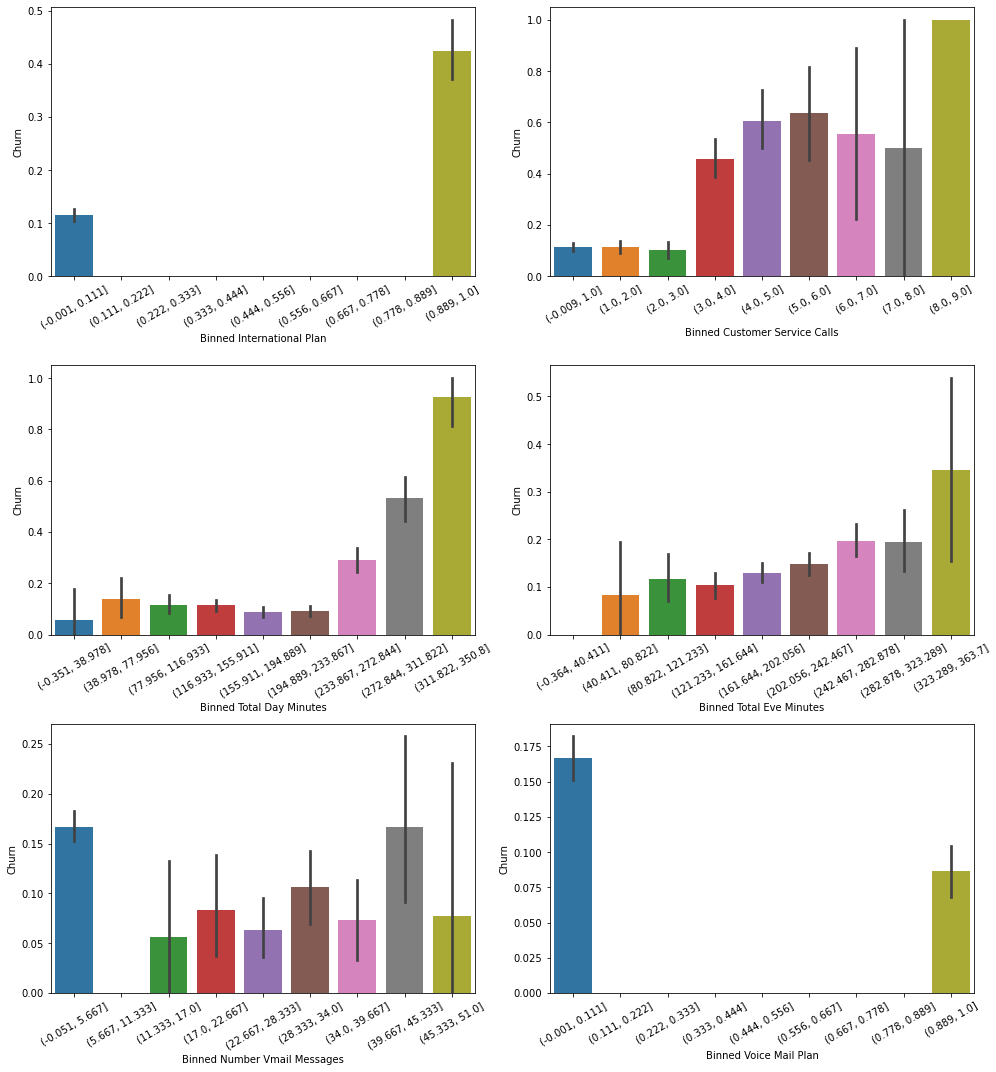

In [460]:
#Visualize our chosen features
fig, ax = plt.subplots(3, 2, figsize=(14,15))
for row in range(3):
    for column in range(2):
        column_to_plot = rel_cols[row * 2 + column]

        # Apply pd.cut to create 10 bins for the column
        df[f'{column_to_plot} bins'] = pd.cut(df[column_to_plot], bins=9)

        sns.barplot(data=df,
                    x=f'{column_to_plot} bins',  # Use the binned column as x
                    y='churn',
                    ax=ax[row, column])
        ax[row, column].set_xlabel(f'Binned {column_to_plot.title()}')
        ax[row, column].set_ylabel('Churn')
        #rotate x-axis labels to improve readability
        ax[row, column].tick_params(axis='x', rotation=30)
fig.tight_layout();

In [461]:
#Make a new df out of our chosen features
df_new = df[rel_cols]
df_new.head()

,international plan,customer service calls,total day minutes,total eve minutes,number vmail messages,voice mail plan,churn
0,0,1,265.1,197.4,25,1,0
1,0,1,161.6,195.5,26,1,0
2,0,0,243.4,121.2,0,0,0
3,1,2,299.4,61.9,0,0,0
4,1,3,166.7,148.3,0,0,0


In [462]:
#Standardize our data using StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the data
scaled_data = scaler.fit_transform(df_new)

# Create a new DataFrame with the scaled values
scaled_df = pd.DataFrame(scaled_data, columns=df_new.columns)

In [463]:
#Let's smote our data to ensure we are have a larger sample of our target variable
smote = SMOTE(sampling_strategy=1)  # Oversample minority class to 50% of the majority class

In [464]:
X = scaled_df.drop('churn', axis=1)
y = df['churn']
y.mean()

0.14491449144914492

In [465]:
# Create train and test data using random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Dummy Classifier

In [466]:
# Create and fit a most frequent dummy classifier
most_frequent_classifier = DummyClassifier(strategy="most_frequent")
most_frequent_classifier.fit(X_train, y_train)

# Make predictions
y_pred_most_frequent = most_frequent_classifier.predict(X_test)

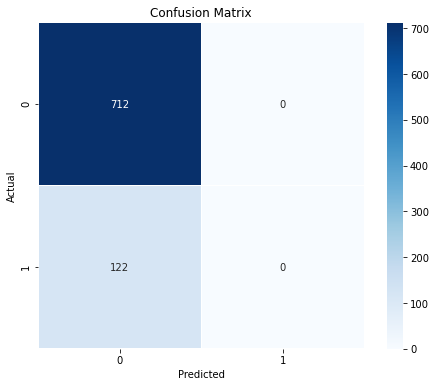

In [467]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred_most_frequent)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [468]:
accuracy = accuracy_score(y_test, y_pred_most_frequent)
precision = precision_score(y_test, y_pred_most_frequent)
recall = recall_score(y_test, y_pred_most_frequent)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_most_frequent)
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC: {roc_auc:.2f}')

Accuracy: 0.854
Precision: 0.00
Recall: 0.00
AUC: 0.50


/usr/local/Caskroom/miniforge/base/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Smote

In [469]:
#Let's smote our data to ensure we are have a larger sample of our target variable
smote = SMOTE(sampling_strategy=1)  # Oversample minority class to 50% of the majority class

In [470]:
### For a quick solution just rename it to itself so the below works
### Note that smoting is making our results worse so will run without
X_train, y_train = smote.fit_resample(X_train, y_train)

In [471]:
#Check that our target variable has indeed gone to 33% churn
## renamed y_train
y_train.value_counts(normalize=True).reset_index()

,index,churn
0,1,0.5
1,0,0.5


In [472]:
X_train

,international plan,customer service calls,total day minutes,total eve minutes,number vmail messages,voice mail plan
0,-0.327580,-0.427932,0.512767,-0.084415,-0.59176,-0.618396
1,-0.327580,-1.188218,-0.915825,0.574281,-0.59176,-0.618396
2,-0.327580,0.332354,-0.642225,-0.711556,-0.59176,-0.618396
3,3.052685,0.332354,-1.865159,-0.100192,-0.59176,-0.618396
4,-0.327580,1.092641,-1.433643,0.035886,-0.59176,-0.618396
...,...,...,...,...,...,...
4271,-0.327580,0.332354,1.765053,0.579094,-0.59176,-0.618396
4272,-0.327580,0.332354,1.159955,1.189732,-0.59176,-0.618396
4273,-0.327580,2.613214,-0.464346,-0.846745,-0.59176,-0.618396
4274,-0.327580,1.092641,0.837810,1.143473,-0.59176,-0.618396


In [473]:
# WE ARE NOT USING THE SMOTE VALUE BELOW BIG ISSUE

# Model 1 Decision Tree

In [474]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

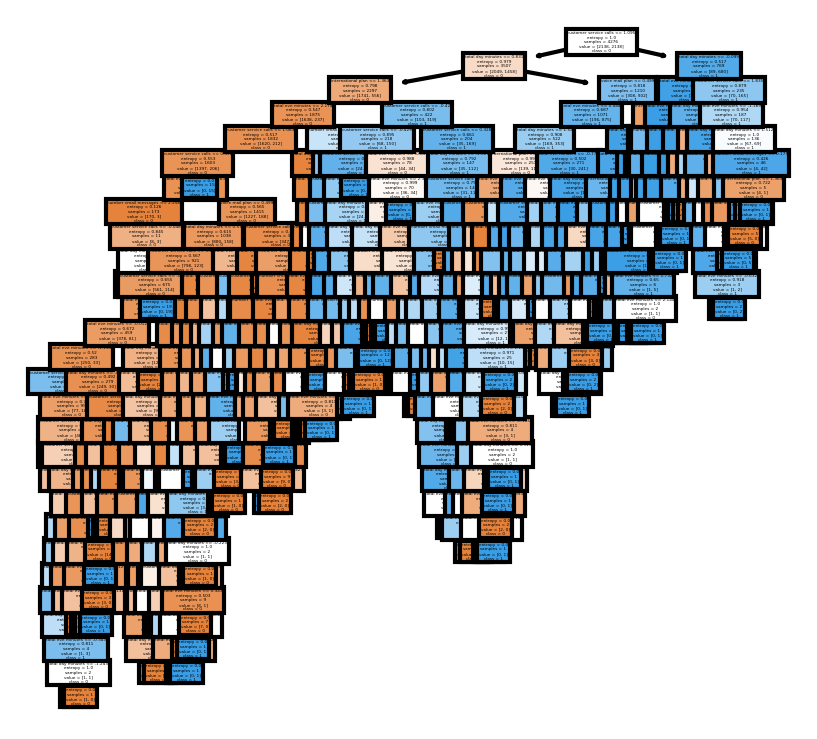

In [475]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = scaled_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [476]:
y_pred_tree = clf.predict(X_test)
print('Recall: ', recall_score(y_test, y_pred_tree))

Recall:  0.6885245901639344


In [477]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
print('Recall: ', recall_score(y_test, y_pred_tree))

Recall:  0.6885245901639344


In [478]:
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_tree)
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC: {roc_auc:.2f}')

Accuracy: 0.871
Precision: 0.55
Recall: 0.69
AUC: 0.80


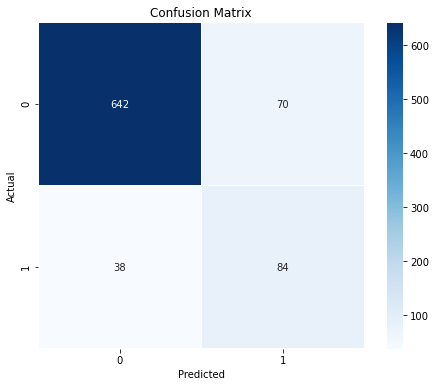

In [479]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred_tree)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Manually find the optimal max depth - hyperparameter tuning

In [480]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=1)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
print('Recall: ', recall_score(y_test, y_pred_tree))

Recall:  0.8278688524590164


In [481]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state=1)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
print('Recall: ', recall_score(y_test, y_pred_tree))

Recall:  0.8442622950819673


# Manually find the the optimal sample splits

In [482]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split = .1, random_state=1)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
print('Recall: ', recall_score(y_test, y_pred_tree))

Recall:  0.7786885245901639


In [483]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split = .5, random_state=1)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
print('Recall: ', recall_score(y_test, y_pred_tree))

Recall:  0.860655737704918


# Manually find the optimal sample leafs

In [484]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 130, random_state=1)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
print('Recall: ', recall_score(y_test, y_pred_tree))

Recall:  0.7786885245901639


In [485]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 110, random_state=1)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
print('Recall: ', recall_score(y_test, y_pred_tree))

Recall:  0.8114754098360656


# Manually find the optimal number of features

In [486]:
clf = DecisionTreeClassifier(criterion='entropy', max_features = 2, random_state=1)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
print('Recall: ', recall_score(y_test, y_pred_tree))

Recall:  0.6721311475409836


In [487]:
clf = DecisionTreeClassifier(criterion='entropy', max_features = 6, random_state=1)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
print('Recall: ', recall_score(y_test, y_pred_tree))

Recall:  0.6885245901639344


In [488]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
print('Recall: ', recall_score(y_test, y_pred_tree))

Recall:  0.6885245901639344


# Retrain on the new tuned decision tree

In [489]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split = .5, random_state=1)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
print('Recall: ', recall_score(y_test, y_pred_tree))

# putting in min_samples_leaf = 9 reduces accuracy when we have max_depth = 6 

Recall:  0.860655737704918


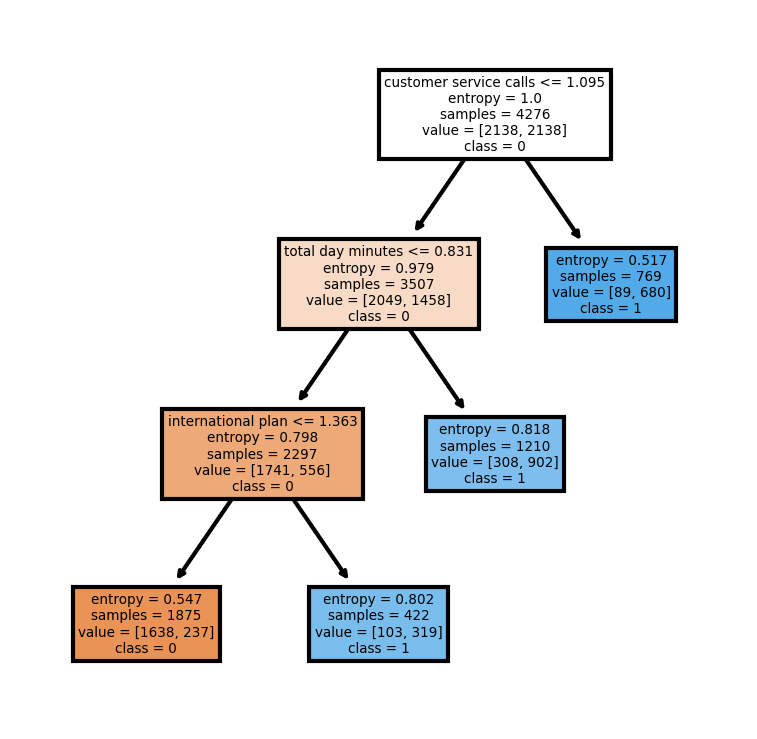

In [490]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = scaled_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

# Full Metrics

In [491]:
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_tree)
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC: {roc_auc:.2f}')

Accuracy: 0.781
Precision: 0.39
Recall: 0.86
AUC: 0.81


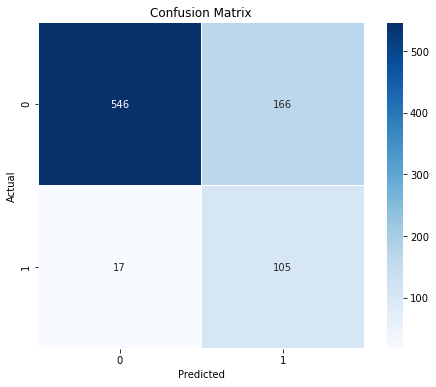

In [492]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred_tree)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [493]:
feature_importances = clf.feature_importances_

In [494]:
feature_names = X_train.columns

In [495]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

In [496]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

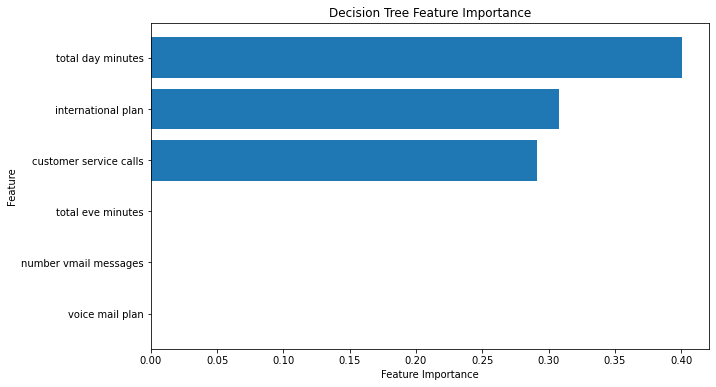

In [497]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Model 2: First Logistic Regression Model

In [509]:
model = LogisticRegression()

In [510]:
model.fit(X_train, y_train)

LogisticRegression()

In [511]:
y_pred_logistic = model.predict(X_test)

In [512]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']  # Optimization algorithm
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv = 5, scoring='recall')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on a test set
test_accuracy = best_model.score(X_test, y_test)

print(best_params)
test_accuracy 



{'C': 1, 'solver': 'liblinear'}


0.8515742128935532

In [513]:
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_logistic)
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC: {roc_auc:.2f}')

Accuracy: 0.852
Precision: 0.48
Recall: 0.12
AUC: 0.55


In [516]:
### Something is clearly wrong here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a logistic regression model
model = LogisticRegression()

# Perform 5-fold cross-validation (you can adjust the 'cv' parameter as needed)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')

# Print the cross-validation scores and mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.14285714 0.15584416 0.22077922 0.24675325 0.16883117]
Mean CV Score: 0.187012987012987


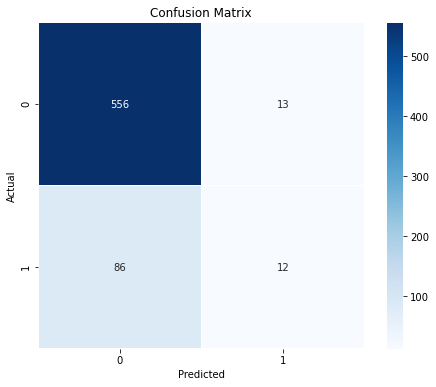

In [514]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred_logistic)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()